<a href="https://www.kaggle.com/code/behradkarimi/cifar-10-image-classification-with-cnn?scriptVersionId=254663206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CIFAR-10 Image Classification with CNN
### Full pipeline including data loading, preprocessing, model training, and evaluation.

## --------------------------------------------------
## 1. Import Required Libraries
## --------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')  # Ensure plots appear inline in notebooks

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

2025-08-06 21:56:30.804440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754517391.007383      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754517391.069956      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## --------------------------------------------------
## 2. Load Dataset
## --------------------------------------------------

In [2]:
# Load CIFAR-10 data and split into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print dataset shapes for confirmation
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Reshape labels from (n, 1) to (n,) for easier indexing
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## --------------------------------------------------
## 3. Visualization Helpers
## --------------------------------------------------

In [3]:
def plot_sample(X, y, index):
    # Display a single image at a specific index
    plt.imshow(X[index])
    plt.axis('off')

def plot_all_classes_grid(X, y, samples=5):
    # Display grid of sample images for each class
    num_classes = len(classes)
    plt.figure(figsize=(samples * 2, num_classes * 2))

    for class_id in range(num_classes):
        idxs = np.where(y == class_id)[0]  # Find all indexes for current class
        idxs = np.random.choice(idxs, samples, replace=False)  # Randomly pick samples

        for i in range(samples):
            plt_idx = class_id * samples + i + 1
            plt.subplot(num_classes, samples, plt_idx)
            plot_sample(X, y, idxs[i])

            if i == 0:
                plt.title(classes[class_id], fontsize=12, loc='left')
            else:
                plt.title('')

    plt.tight_layout()
    plt.show()


## --------------------------------------------------
## 4. Data Overview
## --------------------------------------------------

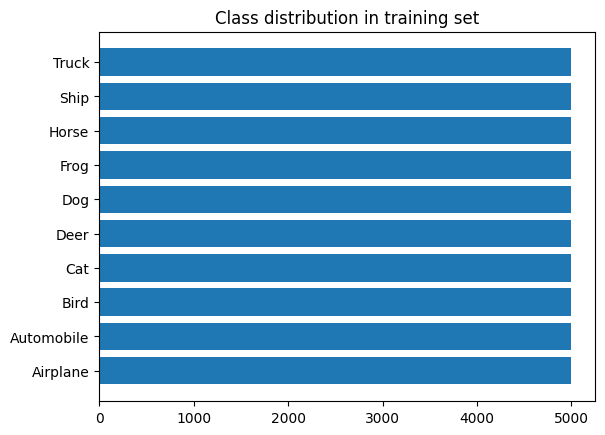

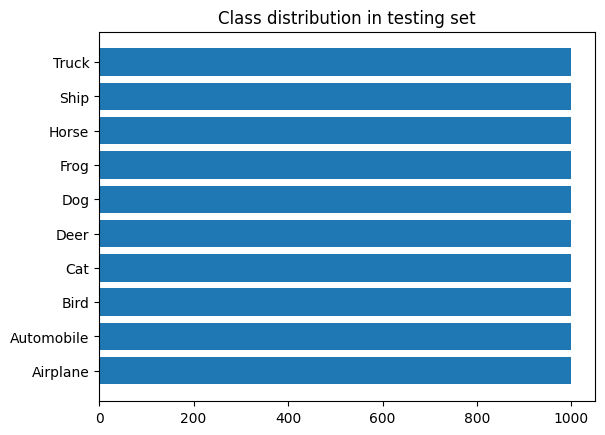

In [4]:
# Class names for CIFAR-10
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
classes, counts = np.unique(y_train, return_counts=True)  # Count samples per class
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')
plt.show()

classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')
plt.show()

## --------------------------------------------------
## 5. Preprocess Data
## --------------------------------------------------

In [5]:
# Normalize image pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert class labels to one-hot encoded vectors
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

## --------------------------------------------------
## 6. CNN Model Architecture
## --------------------------------------------------

In [6]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Block 1
model.add(Conv2D(32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# Compile model with loss function and evaluation metrics
METRICS = ['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1754517415.086466      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

## --------------------------------------------------
## 7. Model Training
## --------------------------------------------------

In [7]:
# Data augmentation for training set
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size=32)
steps_per_epoch = X_train.shape[0] // 32

# Fit model with augmented data
r = model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch, validation_data=(X_test, y_cat_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1754517425.436550      94 service.cc:148] XLA service 0x7d190401bcc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754517425.437589      94 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1754517426.330811      94 cuda_dnn.cc:529] Loaded cuDNN version 90300


   7/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.0897 - loss: 4.6497 - precision: 0.0794 - recall: 0.0483  

I0000 00:00:1754517433.301990      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 60s 28ms/step - accuracy: 0.3323 - loss: 1.9180 - precision: 0.5033 - recall: 0.1261 - val_accuracy: 0.4350 - val_loss: 1.7270 - val_precision: 0.5455 - val_recall: 0.3054
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5000 - loss: 1.2350 - precision: 0.8571 - recall: 0.3750

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.5000 - loss: 1.2350 - precision: 0.8571 - recall: 0.3750 - val_accuracy: 0.4369 - val_loss: 1.7125 - val_precision: 0.5505 - val_recall: 0.3082
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5332 - loss: 1.3098 - precision: 0.7051 - recall: 0.3510 - val_accuracy: 0.6512 - val_loss: 0.9823 - val_precision: 0.7962 - val_recall: 0.4986
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.4375 - loss: 1.1635 - precision: 0.7857 - recall: 0.3438 - val_accuracy: 0.6486 - val_loss: 0.9890 - val_precision: 0.7995 - val_recall: 0.4943
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6161 - loss: 1.0946 - precision: 0.7559 - recall: 0.4745 - val_accuracy: 0.6236 - val_loss: 1.0838 - val_precision: 0.7231 - val_recall: 0.5398
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.5312 - loss: 0.9859 - precision: 0.7500 - recall: 0.4688 - val_accuracy: 0.6260 - val

## --------------------------------------------------
## 8. Evaluation Metrics
## --------------------------------------------------

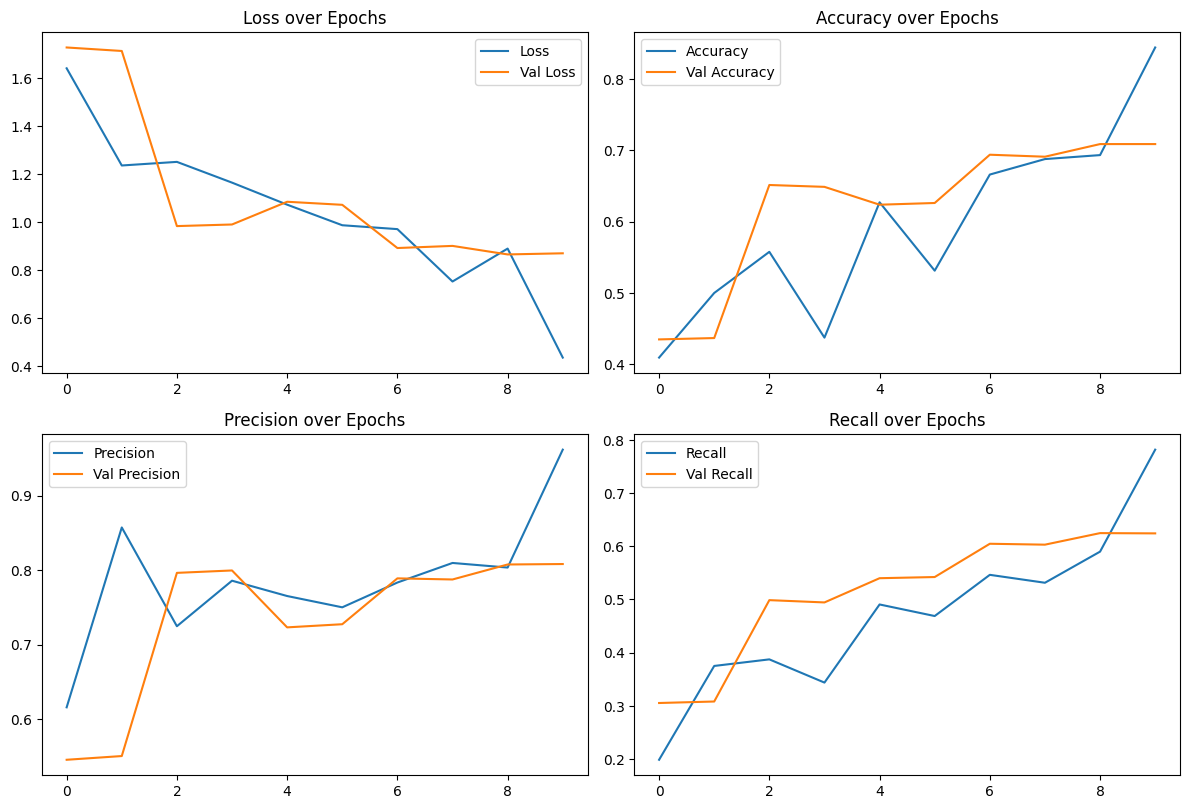

In [8]:
# Plot training history: loss, accuracy, precision, recall
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='Precision')
plt.plot(r.history['val_precision'], label='Val Precision')
plt.title('Precision over Epochs')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='Recall')
plt.plot(r.history['val_recall'], label='Val Recall')
plt.title('Recall over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

## --------------------------------------------------
## 9. Confusion Matrix
## --------------------------------------------------

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


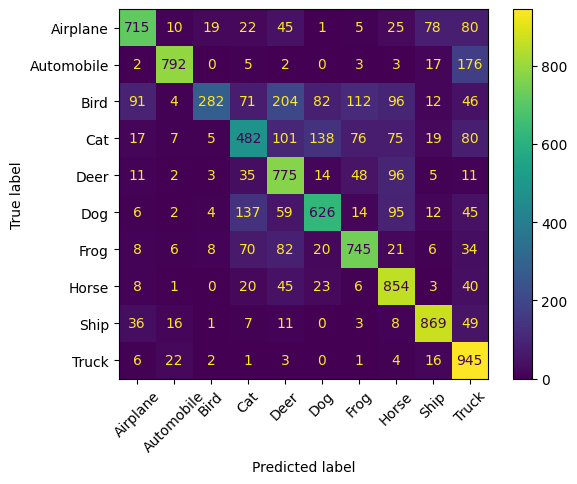

In [9]:
# Predict on test data and display confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
labels = classes_name

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(xticks_rotation=45)
plt.show()

## --------------------------------------------------
## 10. Sample Prediction Visualization
## --------------------------------------------------

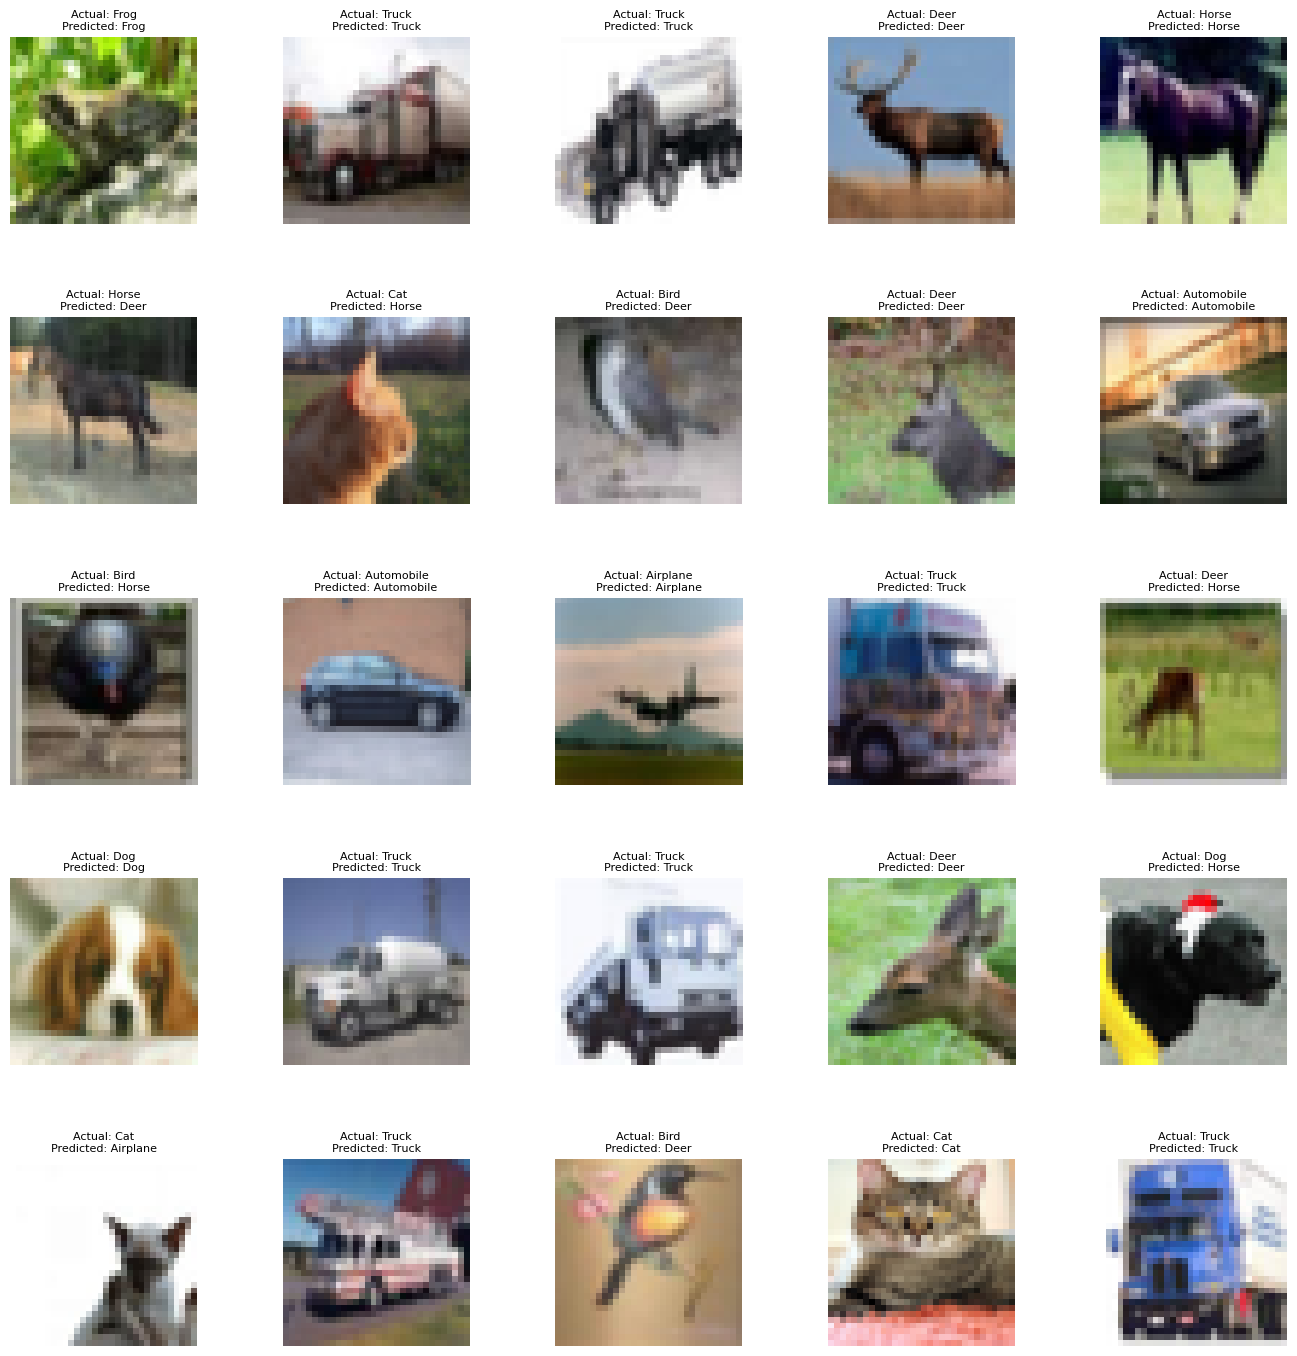

In [10]:
# Display sample predictions with ground truth vs model prediction
fig, axes = plt.subplots(5, 5, figsize=(17, 17))
axes = axes.ravel()
n_test = len(X_test)

for i in np.arange(0, 25):
    index = np.random.randint(0, n_test)
    axes[i].imshow(X_test[index])
    true_label = labels[y_test[index]]
    pred_label = labels[y_pred[index]]
    axes[i].set_title(f"Actual: {true_label}\nPredicted: {pred_label}", fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()


## --------------------------------------------------
## Conclusion and Future Improvements
## --------------------------------------------------

Based on the training and validation metrics plotted above, we can draw the following conclusions:

 - The training loss decreased significantly during early epochs but started to increase slightly toward the end, 
   indicating possible overfitting.
 - Validation loss plateaued after a few epochs and did not improve further.
 - Training and validation accuracy reached around 70–80%, suggesting the model has learned a decent representation 
   but is not improving beyond a certain point.
 - Precision is relatively stable and consistently high (around 0.8), showing the model is good at avoiding false positives.
 - Recall increased over epochs but remained lower than precision (~0.6–0.68), which implies the model is still missing 
   some relevant predictions (false negatives).

Suggestions for future improvements:

 1. Use EarlyStopping to prevent overfitting by stopping training when validation loss stops improving.
 2. Experiment with more powerful architectures such as ResNet, EfficientNet, or MobileNetV2 for better feature extraction.
 3. Apply regularization techniques such as L2 regularization or increase Dropout rates to reduce overfitting.
 4. Enhance data augmentation strategies to improve generalization.